In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters

df = pd.read_csv('fcc-forum-pageviews.csv').set_index('date')
df.index = pd.to_datetime(df.index)
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [16]:
#Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


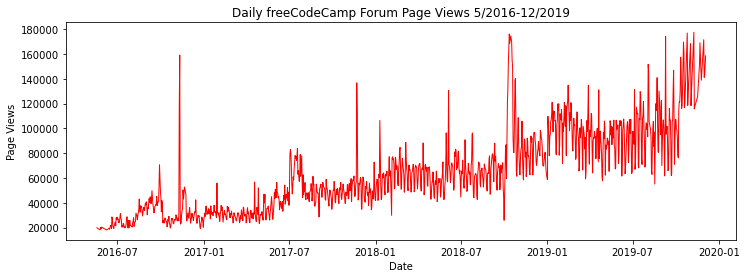

In [26]:
# Draw line plot
#fig, ax = plt.subplots(figsize = (12, 4))
#df.plot(ax = ax, title = "Daily freeCodeCamp Forum Page Views 5/2016-12/2019", ylabel="Page Views", #xlabel="Date")

fig, ax = plt.subplots(figsize = (12,4))
ax.plot(df.index, df['value'], color='red', linewidth=1)
ax.set(title="Daily freeCodeCamp Forum Page Views 5/2016-12/2019", xlabel="Date", ylabel="Page Views")

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

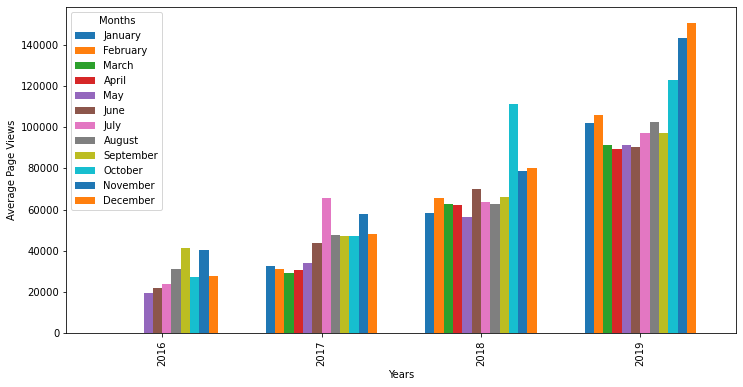

In [57]:
#Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".

# Copy and modify data for monthly bar plot
df_bar = df.copy().groupby([df.index.year, df.index.month]).mean()

# Draw bar plot
ax = df_bar.unstack().plot(kind='bar',figsize = (12,6), width=(0.7))
fig = ax.get_figure()
ax.legend(title = "Months", labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
ax.set(xlabel = "Years", ylabel = "Average Page Views")                 
fig = ax.get_figure()

plt.show

[Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Page Views'),
 Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')]

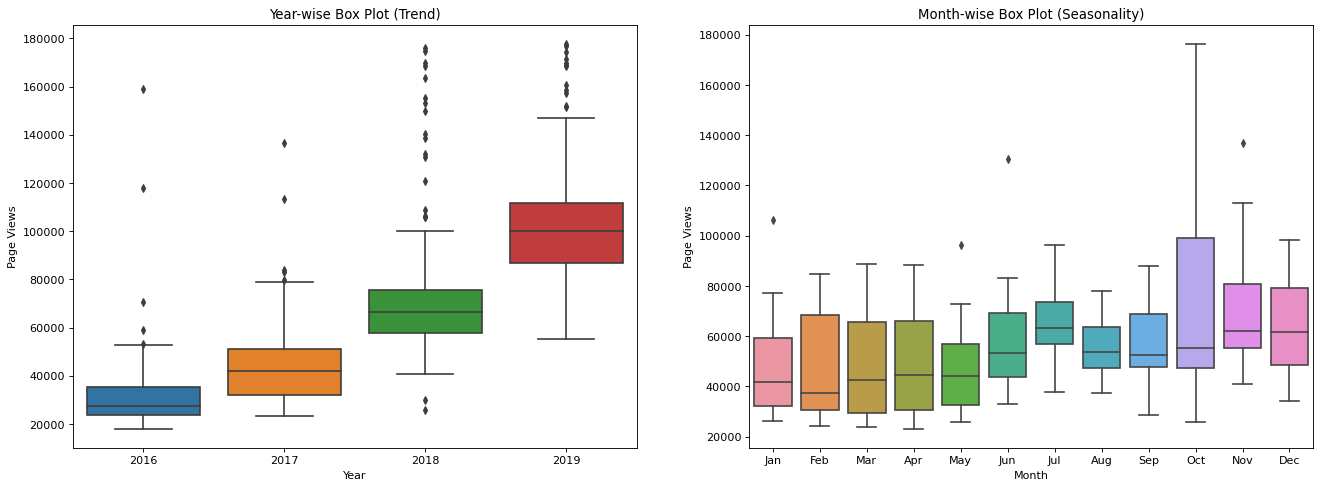

In [58]:
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

# Draw box plots (using Seaborn)
fig, ax = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df_box, ax=ax[0]).set(xlabel='Year', ylabel='Page Views', title='Year-wise Box Plot (Trend)')
sns.boxplot(x='month', y='value', data=df_box.loc[~df_box.year.isin([2016, 2019]), :]).set(xlabel='Month', ylabel='Page Views', title='Month-wise Box Plot (Seasonality)')